# Limpieza e imputación de datos

Explorar y analizar datos a menudo significa tratar con valores perdidos, tipos de datos incorrectos y valores atípicos. En este capítulo, aprenderás técnicas para gestionar estos problemas y agilizar tus procesos en EDA.

## Tratar los datos que faltan

-   Por qué un dato faltante es un problema?

    -   Afectan las distribuciones
    -   Los datos de la población son menos repreesntativos
    -   Puede resultar en conclusiones incorrectas

-   Ejemplo datos de profesionales de datos

| Column | Description | Data type |
|--------------------|---------------------------------|-------------------|
| `Working_Year` | Year the data was obtained | Float |
| `Designation` | Job title | String |
| `Experience` | Experience level e.g., `"Mid"`, `"Senior"` | String |
| `Employment_Satus` | Type of employment contract e.g., `"FT"`, `"PT"` | String |
| `Employee_Location` | Country of employment | String |
| `Company_Size` | Labels for company size e.g., `"S"`, `"M"`, `"L"` | String |
| `Remote_Working_Ratio` | Porcentage of time working remotely | Integer |
| `Salary_USD` | Salary in US dollars | Float |

-   Revisando los datos faltantes

In [1]:
#| echo: true
#| eval: false
print(salaries.isna().sum())

![](images/paste-22.png)

-   Estrategias para el manejo de datos faltantes

    -   Eliminar los datos faltantes

        -   5 % o menos del total de valores

    -   Imputar la media, mediana o la moda

        -   Depende de la distribución y contexto

    -   Imputar por sub-grupos

        -   Diferentes niveles de experiencia tienen diferente mediana en el salario

-   Eliminando valores faltantes

In [2]:
#| echo: true
#| eval: false
threshold = len(salaries) * 0.05
print(threhold)

![](images/paste-23.png)

In [3]:
# | echo: true
# | eval: false
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print(cols_to_drop)

![](images/paste-24.png)

In [4]:
#| echo: true
#| eval: false
salaries.dropna(subset=cols_to_drop, inplace=True) # Para actualizar el DataFrame

-   Imputando una estadística de resumen

In [5]:
#| echo: true
#| eval: false
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
print(cols_with_missing_values)

![](images/paste-25.png)

In [6]:
#| echo: true
#| eval: false
    for col in cols_with_missing_values[:-1]:
        salaries[col].fillna(salaries[col].mode()[0])

-   Revisando los valores faltantes que faltan

In [7]:
#| echo: true
#| eval: false
print(salaries.isna().sum())

![](images/paste-26.png)

-   Imputando por subgrupo

In [8]:
#| echo: true
#| eval: false
salaries_dict = salaries.groupby('Experience')['Salary_USD'].median().to_dict()
print(salaries_dict)

![](images/paste-27.png)

In [9]:
#| echo: true
#| eval: false
salaries['Salary_USD'] = salaries['Salary_USD'].fillna(salaries['Experience'].map(salaries_dict))

![](images/paste-28.png)

### Tratar los datos que faltan

Es importante tratar los datos que faltan antes de empezar el análisis.

Un enfoque consiste en descartar los valores que faltan si representan una pequeña proporción, normalmente el 5 %, de los datos.

Trabajando con un conjunto de datos sobre precios de tiquetes de avión, almacenado como un DataFrame de pandas llamado `planes`, tendrás que contar el número de valores perdidos en todas las columnas, calcular el cinco porciento de todos los valores, utilizar este umbral para eliminar observaciones y comprobar cuántos valores perdidos quedan en el conjunto de datos.

In [10]:
import pandas as pd

ruta = './data/planes.csv'
planes = pd.read_csv(ruta)
print(planes.head)

<bound method NDFrame.head of            Airline Date_of_Journey    Source Destination  \
0      Jet Airways       9/06/2019     Delhi      Cochin   
1           IndiGo      12/05/2019   Kolkata    Banglore   
2           IndiGo      01/03/2019  Banglore   New Delhi   
3         SpiceJet      24/06/2019   Kolkata    Banglore   
4      Jet Airways      12/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10655     Air Asia       9/04/2019   Kolkata    Banglore   
10656    Air India      27/04/2019   Kolkata    Banglore   
10657  Jet Airways      27/04/2019  Banglore       Delhi   
10658      Vistara      01/03/2019  Banglore   New Delhi   
10659    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
1            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
2            BLR → NA

#### Instrucciones

1.  Imprime el número de valores perdidos en cada columna del DataFrame

In [11]:
# Count the number of missing values in each column
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


2.  Calcula a cuántas observaciones equivale el cinco porciento del DataFrame `planes`

In [12]:
# Find the five percent threshold
threshold = len(planes) * 0.05
print(threshold)

533.0


3.  

-   Crea `cols_to_drop` aplicando una indexación booleana a las columnas del DataFrame con valores perdidos menores o iguales que el umbral.

-   Utiliza este filtro para eliminar los valores que faltan y guardar el DataFrame actualizado.

In [13]:
# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
print(cols_to_drop)

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


Al crear un umbral de valores faltantes y usarlo para filtrar columnas, haz logrado eliminar los valores faltantes de todas las columnas excepto `"Additinal_Info"` y `"Price"`.

### Estrategias para datos que faltan

La regla del cinco porciento ha funcionado muy bien en tu conjunto de dato `planes`, ¡eliminando los valores perdidos de nueve de las 11 columnas!

Ahora tienes que decidir qué hacer con las columnas `"Additional_Info"` y `"Price"`, a las que les faltan los valores `300` y `368` respectivamente.

Primero echarás un vistazo a lo que contiene `"Additional_Info"`, y después visualizarás el precio de los billetes de avión de distintas compañías aéreas.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Instrucciones

1.  Imprime los valores y frecuencias de `"Additional_Info"`.

In [15]:
# Check the values of the Additional_Info column
print(planes['Additional_Info'].value_counts())

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


2.  Crea un boxplot de `"Price"` frente a `"Airline"`

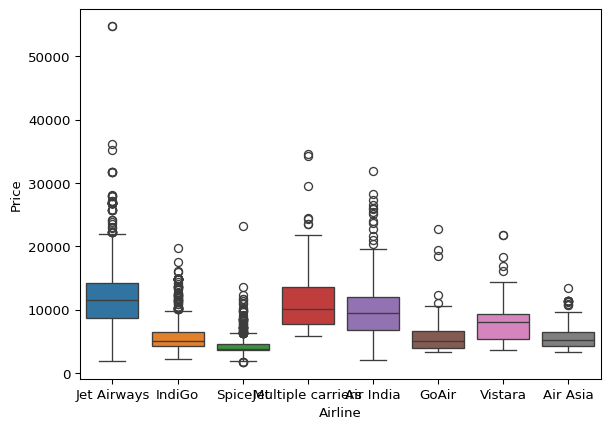

In [16]:
# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price',
            hue='Airline', legend=False)

plt.show()

3.  **Pregunta**

-   ¿Cómo debes tratar los valores que faltan en `"Additional_Info"` y `"Price"`.?

**Respuestas Posibles**

-   [ ] Elimina la columna `"Additional_Info"` e imputa la media para los valores que faltan de `"Price"`.
-   [ ] Elimina los valores de `"No info"` de `"Additiona_Info"` e imputa la mediana de los valores que faltan de `"Price"`.
-   [ ] Elimina la columna `"Additional_Info"` e imputa la media por `"Airline"` para los valores que falten de `"Price"`.
-   [x] Elimina la columna `"Additional_Info"` e imputa la mediana por `"Airline"` para los valores que falten de `"Price"`.

No necesitamos la columna `"Additional_Info"`, y deberías imputar la mediana de `"Price"` por `"Airline"` para representar los datos con precisión.

### Imputar los precios de los aviones que faltan

!Ahora solo queda una columna con valores perdidos!

Has eliminado la columna `"Additional_Info"` de `planes`, el último paso es imputar los datos que faltan en la columna `"Price"` del conjunto de datos.

Como recordatorio, tú generaste este diagrama de caja, que sugería que imputar el precio medio basándose en el `"Airline"` ¡es un enfoque sólido!

In [17]:
# Eliminamos la columna Additional_Info
planes = planes.drop('Additional_Info', axis=1)
planes.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

#### Instrucciones

1.  Agrupa `planes` por aerolínea y calcula el precio medio.

In [18]:
# Calculate median plane ticket prices by Airplane
airline_prices = planes.groupby('Airline')['Price'].median()

print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


2.  Convierte los precios medios agrupados en un diccionario.

In [19]:
# Convert to a dictionary
prices_dict = airline_prices.to_dict()
print(prices_dict)

{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}


3.  

-   Imputa condicionalmente los valores perdidos de `"Price"` asignando los valores de la columna `"Airline"` en función de `prices_dict`

-   Comprueba si faltan valores

In [20]:
# Map the dictionary to missing values of Price by Airline
planes['Price'] = planes['Price'].fillna(planes['Airline'].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


Convertiste un DataFrame agrupado a un diccionario y luego lo usaste para llenar condicionalmente los valores faltantes de `"Price"` basándote en `"Airline"`. Ahora vamos a explorar cómo realizar análisis exploratorio en datos categóricos.

## Convertir y analizar datos categóricos

-   Previsualizar los datos

In [21]:
#| echo: true
#| eval: false
print(salaries.select_dtypes('object').head())

![](images/paste-29.png)

-   Títulos de los trabajos

In [22]:
#| echo: true
#| eval: false
print(salaries['Designation'].value_counts())

![](images/paste-30.png)

In [23]:
# | echo: true
# | eval: false
print(salaries['Designation'].nunique())

![](images/paste-31.png)

![](images/paste-32.png)

-   Extrayendo valores desde las categorías

    -   El formato actual de los datos limita la capacidad de generar información.

    -   `pandas.Series.str.contains()`

        -   Busca en una columna una cadena especifica o múltiples cadenas.

In [24]:
#| echo: true
#| eval: false
salaries['Designation'].str.contains('Scientist')

![](images/paste-33.png)

-   Filtrar filas que contienen una o más frases

    -   Palabras de interes: Machine Learning o AI

In [25]:
#| echo: true
#| eval: false
salaries['Designation'].str.contains('Machine Learning|AI')

![](images/paste-34.png)

-   Buscar múltiples frases en una cadena de caracteres

    -   Palabras de interes: Cualquiera que inicie con Data

In [26]:
# | echo: true
# | eval: false
salaries['Designation'].str.contains('ˆData')

![](images/paste-35.png)

Ahora que se tiene una idea de cómo funciona este método, definamos una lista de títulos de trabajo que queremos encontrar:

In [27]:
#| echo: true
#| eval: false
job_categories = ['Data Science', 'Data Analytics',
                   'Data Engineering', 'Machine Learning',
                   'Managerial', 'Consultant']

Luego necesitamos crear variables que contengan nuestros filtros

In [28]:
#| echo: true
#| eval: false
data_science = 'Data Scientist|NLP'
data_analyst = 'Analyst|Analytics'
data_engineer = 'Data Engineer|ETL|Architect|Infrastructure'
ml_engineer = 'Machine Learning|ML|Bid Data|AI'
manager = 'Manager|Head|Director|Lead|Principal|Staff'
consultant = 'Consultant|Freelance'

El siguiente paso es crear una lista con nuestro rango de condiciones para el método `str.contains`

In [29]:
#| echo: true
#| eval: false
conditions = [
    (salaries['Designation'].str.contains(data_science)),
    (salaries['Designation'].str.contains(data_analyst)),
    (salaries['Designation'].str.contains(data_engineer)),
    (salaries['Designation'].str.contains(ml_engineer)),
    (salaries['Designation'].str.contains(manager)),
    (salaries['Designation'].str.contains(consultant))
]

Finalmente, podemos crear nuestra nueva columna `Job_Category` usando la función de selección de Numpy

In [30]:
#| echo: true
#| eval: false
salaries['Job_Category'] = np.select(conditions,
                                     job_categories,
                                     default='Other')

Al obtener una vista previa de la Designación y nuestra nueva columna Job_Category, podemos verificar los primeros cinco valores.

In [31]:
#| echo: true
#| eval: false
print(salaries[['Designation', 'Job_Category']].head())

![](images/paste-36.png)

-   Visualización de la frecuencia de la categoría job

In [32]:
#| echo: true
#| eval: false
sns.countplot(data=salaries, x='Job_Category')
plt.show()

![](images/paste-37.png)

### Encontrar el número de valores únicos

Te gustaría practicar algunas de las habilidades de manipulación y análisis de datos categóricos que acabas de ver. Para ayudarte a identificar qué datos podrían reformatearse para extraer valor, vas a averiguar qué columnas no numéricas del conjunto de datos `planes` tienen un gran número de valores únicos.

#### Instrucciones

-   Filtra `planes` para las columnas que sean del tipo datos `"object"`.

-   Recorre las columnas del conjunto de datos.

-   Añade el iterador de columna a la sentencia print y, a continucación, llama a la función para que devuelva el número de valores únicos de la columna.

In [33]:
# Filter the DataFrame for objects columns
non_numeric = planes.select_dtypes('object')

# Loop through columns
for column in non_numeric.columns:
    # Print the number of unique values
    print(f"Number of unique values in {column} column: {non_numeric[column].nunique()}")

Number of unique values in Airline column: 8
Number of unique values in Date_of_Journey column: 44
Number of unique values in Source column: 5
Number of unique values in Destination column: 6
Number of unique values in Route column: 122
Number of unique values in Dep_Time column: 218
Number of unique values in Arrival_Time column: 1220
Number of unique values in Duration column: 362
Number of unique values in Total_Stops column: 5


Curiosamente, `"Duration"` es actualmente una columna de tipo objeto cuando debería ser una columna numérica, ¡y tiene 362 valores únicos! Vamos a averiguar más sobre esta columna.

### Categoría de duración de vuelos

Como has visto, hay 362 valores únicos en la columna `"Duration"` de `planes`. Llamando a `planes['Duration'].head()`, vemos los siguientes valores.

In [34]:
#| echo: false
planes['Duration'].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

Parece que no será sencillo convertirlo a números. Sin embargo, ¡podrías clasificar los vuelos por duración y examinar la frecuencia de las distintas longitudes de vuelo!

Crearás una columna `"Duration_Category"` en el DataFrame `planes`. Antes tendrás que crear una lista de valores que deseas insertar en el DataFrame, seguida de los valores existentes a partir de los cuales deben crearse.

#### Instrucciones

1.  Crea una lista de categorías que contengan `"Short-haul"`, `"Medium"` y `"Long-haul"`.

In [35]:
# Create a list of categories
flight_categories = ['Short-haul', 'Medium', 'Long-haul']

2.  

-   Crea `short_flights`, una cadena para capturar valores de `"0h"`, `"1h"`, `"2h"`, `"3h"`, `"4h"` teniendo cuidado de evitar valores como `"10h"`.

-   Crea `medium_flights` para capturar cualquier valor entre cinco y nueve horas. \~

-   Crea `long_flights` para capturar cualquier valor comprendido entre 10 y 16 horas, ambos inclusive.

In [36]:
# Create a list of categories
flight_categories = ['Short-haul', 'Medium', 'Long-haul']

# Create short-haul values
short_flights = '^0h|^1h|^2h|^3h|^4h'

# Create medium-haul values
medium_flights = '^5h|^6h|^7h|^8h|^9h'

# Create long-haul values
long_flights = '^10h|^11h|^12h|^13h|^14h|^15h|^16h'

Ahora has creado tus categorías y valores, es hora de agregar condicionalmente las categorías en el DataFrame

### Añadir categorías de duración

Ahora que has configurado las categorías y los valores que quieres capturar, ¡es hora de construir una nueva columna para analizar la frecuencia de los vuelos según su duración!

Las variables`flight_categories`, `short_flights`, `medium_flights` y `long_flights` que creaste anteriormente están a tu disposición.

In [37]:
import numpy as np

#### Instrucciones

-   Crea `conditions`, una lista que contenga subconjuntos de `planes['Duration']` basados en `short_flights`, `medium_flights` y `long_flights`.

-   Crea la columna `"Duration_Category"` llamando a una función que acepte tu lista `conditions` y `flight_categories`, estableciendo los valores no encontrados en `"Extreme duration"`.

-   Crea un gráfico fque muestre el recuento de cada categoría.

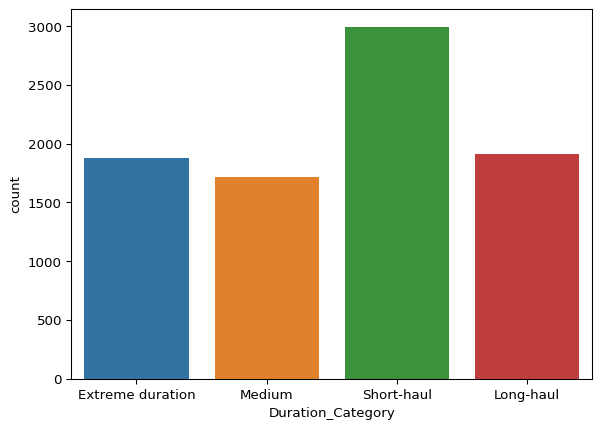

In [38]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes['Duration'].str.contains(short_flights)),
    (planes['Duration'].str.contains(medium_flights)),
    (planes['Duration'].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes['Duration_Category'] = np.select(conditions, flight_categories,
                                        default='Extreme duration')

# Plot the counts of each categoryß
sns.countplot(data=planes, x='Duration_Category',
              hue='Duration_Category', legend=False)
plt.show()

¡Está claro que la mayoría de los vuelos son de corta distancia.

## Trabajar con datos numéricos

-   El dataset origina de los salarios

In [39]:
#| echo: true
#| eval: false
print(salaries.info())

![](images/paste-38.png)

-   Salario en Rupias

In [40]:
#| echo: true
#| eval: false
print(salaries['Salary_In_Rupees'].head())

![](images/paste-39.png)

-   Convirtiendo cadena de caracteres en números

    -   Remover las comas de los valores `Salary_In_Rupees`

    -   Convertir la columna a tipo de dato `float`

    -   Crear una nueva columna convirtiendo la moneda a dólares

In [41]:
#| echo: true
#| eval: false
pd.Series.str.replace('Caracter a remover', 'Caracter a reemplazar')

In [42]:
#| echo: true
#| eval: false
salaries['Salary_In_Rupees'] = salaries['Salary_In_Rupees'].str.replace(',', '')
print(salaries['Salary_In_Rupees'].head())

![](images/paste-40.png)

In [43]:
#| echo: true
#| eval: false
salaries['Salary_In_Rupees'] = salaries['Salary_In_Rupees'].astype(float) 

1 Indian Rupee = 0.012 US Dollars

In [44]:
#| echo: true
#| eval: false
salaries['Salary_USD'] = salaries['Salary_In_Rupees'] * 0.012

-   Previsualizando la nueva columna

In [45]:
#| echo: true
#| eval: false
print(salaries[['Salary_In_Rupees', 'Salary_USD']].head())

![](images/paste-41.png)

-   Añadiendo un resumen esrtadístico al DataFrame

In [46]:
#| echo: true
#| eval: false
salaries.groupby('Company_Size')['Salary_USD'].mean()

![](images/paste-42.png)

Calculo de la desviación estándar de los salarios por experiencia:

![](images/paste-43.png)

In [47]:
#| echo: true
#| eval: false
salaries['std_dev'] = salaries.groupby('Experience') \ 
                      ['Salary_USD'].transform(lambda x: x.std())

In [48]:
#| echo: true
#| eval: false
print(salaries[['Experience', 'std_dev']].value_counts())

![](images/paste-44.png)

Repitamos el proceso para otros datos estadísticos:

In [49]:
#| echo: true
#| eval: false
salaries['median_by_comp_size'] = salaries.groupby('Company_Size') \
                                  ['Salary_USD'].transform(lambda x: x.median())

In [50]:
#| echo: true
#| eval: false
print(salaries[['Company_Size', 'median_by_comp_size']].head())

![](images/paste-45.png)

### Duración del vuelo

Te gustaría analizar la duración de los vuelos, pero por desgracia, la columna `"Duration"` de DataFrame `planes` contiene actualmente valores de cadena.

Tendrás que limpiar la columna y convertirla al tipo de datos correcto para el análisis.

In [51]:
import re

def duration_to_decimal_str(duration_str: str) -> str:
    '''
    Convierte una duración de vuelo de formato '2h 30m' a una cadena en formato decimal en horas, como '2.5h'.
    
    Parámetros:
    -----------
    duration_str : str
        Cadena de texto que representa la duración de un vuelo, como '2h 30m', '45m', '19h', etc.

    Retorna:
    --------
    str
        Cadena con duración expresada en horas decimales, con un solo decimal y el sufijo 'h'. Ej: '2.5h'
    '''
    horas = re.search(r'(\d+)\s*h', duration_str)
    minutos = re.search(r'(\d+)\s*m', duration_str)

    h = int(horas.group(1)) if horas else 0
    m = int(minutos.group(1)) if minutos else 0

    decimal_hours = round(h + m / 60, 1)
    return f'{decimal_hours}h'



planes['Duration'] = planes['Duration'].apply(duration_to_decimal_str)

#### Instrucciones

1.  Imprime los cinco primeros valores de la columna `"Duration"`.

In [52]:
# Preview the column
print(planes['Duration'].head())

0    19.0h
1     5.4h
2     4.8h
3     2.4h
4    15.5h
Name: Duration, dtype: object


2.  Retira `"h"` de la columna

In [53]:
# Remove the string character
planes['Duration'] = planes['Duration'].str.replace('h', '')
print(planes['Duration'].head())

0    19.0
1     5.4
2     4.8
3     2.4
4    15.5
Name: Duration, dtype: object


3.  Convierte la columna al tipo de datos `float`.

In [54]:
# Convert to float data type
planes['Duration'] = planes['Duration'].astype(float)
print(planes['Duration'].head())

0    19.0
1     5.4
2     4.8
3     2.4
4    15.5
Name: Duration, dtype: float64


4.  Traza un histograma de los valores de `"Duration"`

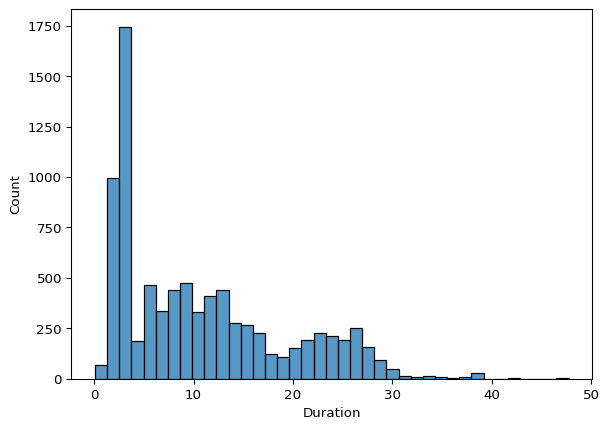

In [55]:
# Plot a histogram
sns.histplot(data=planes, x='Duration')
plt.show()

### Añadir estadísticas descriptivas

Ahora `"Duration"` y `"Price"`contienen valores numéricos en el DataFrame `planes`, y te gustaría calcular para ellos estadísticas de resumen condicionadas a los valores de otras columnas.

#### Instrucciones

1.  Añade una columna a `planes` que contenga la desviación estándar de `"Price"` basada en `"Airline"`.

In [56]:
# Price standard deviation by Airline
planes['airline_price_st_dev'] = planes.groupby('Airline')['Price'].transform(lambda x: x.std())
print(planes[['Airline', 'airline_price_st_dev']].value_counts())

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
Name: count, dtype: int64


2.  Calcula la mediana de `"Duration"` en `"Airline"`, almacenándola como una columna llamada `"airline_median_duration"`.

In [57]:
# Median Duration by Airline
planes['airline_median_duration'] = planes.groupby('Airline')['Duration'].transform(lambda x: x.median())
print(planes[['Airline', 'airline_median_duration']].value_counts())

Airline            airline_median_duration
Jet Airways        13.3                       3082
IndiGo             2.9                        1632
Air India          15.5                       1399
Multiple carriers  10.2                        959
SpiceJet           2.5                         653
Vistara            3.2                         376
Air Asia           2.8                         260
GoAir              2.9                         147
Name: count, dtype: int64


3.  Encuenta la media `"Price"` por `"Destination"`, guardándola como una columna llamada `"price_destination_mean"`.

In [58]:
# Mean Price by Destination
planes['price_destination_mean'] = planes.groupby('Destination')['Price'].transform(lambda x: x.mean())
print(planes[['Destination', 'price_destination_mean']].value_counts())

Destination  price_destination_mean
Cochin       10473.585927              3631
Banglore     9093.622872               2291
Delhi        5248.541082                998
New Delhi    11579.306944               720
Hyderabad    5190.274021                562
Kolkata      4907.156863                306
Name: count, dtype: int64


Parece que Jet Airways tiene la mayor desviación estándar en precio, Air India tiene la mayor duración median, y Nueva Delhi, en promedio, es el destiono más caro. Ahora veamos cómo manejar los datos atípicos.

## Gestión de valores atípicos

-   Qué es un outlier?
    -   Es una observación que está muy alejada de otros puntos de datos.
-   Usando estadística descriptiva

In [59]:
#| echo: true
#| eval: false
print(salaries['Salary_USD'].describe())

![](images/paste-46.png)

-   Usando el rango intercuartil

    -   Rango intercuartil (IQR)

        -   IQR = 75th - 25th percentil

        -   Upper outliers \> 75th percentile + (1.5 \* IQR)

        -   Lower Outliers \< 25th percentile - (1.5 \* IQR)

In [60]:
#| echo: true
#| eval: false
sns.boxplot(data=salaries, y='Salaary_USD')
plt.show()

![](images/paste-47.png)

-   Identificando Umbrales

In [61]:
#| echo: true
#| eval: false
# 75th percentil
seventy_fifth = salaries['Salary_USD'].quantile(0.75)

# 25th percentil
twenty_fifth = salaries['Salary_USD'].quantile(0.25)

# Interquartil range
salaries_iqr = seventy_fifth - twenty_fifth

print(salaries_iqr)

![](images/paste-48.png)

In [62]:
#| echo: true
#| eval: false
# Upper threshold
upper = seventy_fifth + (1.5 * salaries_iqr)

# Lower threshold
lower = twenty_fifth - (1.5 * salaries_iqr)

print(upper, lower)

![](images/paste-49.png)

-   Subdividiendo nuestros datos

In [63]:
#| echo: true
#| eval: false
salaries[(salaries['Salary_USD'] < lower) | (salaries['Salary_USD'] > upper)] \
        [['Experience', 'Employee_Location', 'Salary_USD']]

![](images/paste-50.png)

-   ¿ Por qué buscar los Outliers?

    -   Los Outliers son valores extremos

        -   Pueden no representar con precisión los datos

    -   Pueden sesgar la media y la desviación estándar

    -   Pruebas de estadística y modelos de machine learning requieren datos que tengan una distribución normal y no esten sesgados.

-   Qué hacer con los Outliers?

    -   Preguntas que nos debemos hacer:

        -   Por qué existen los outliers?

        -   Los valores son precisos?

-   Eliminación de Outliers

In [64]:
#| echo: true
#| eval: false
no_outliers = salaries[(salaries['Salar_USD'] > lower) & (salaries['Salary_USD'] < upper)]

In [65]:
#| echo: true
#| eval: false
print(no_outliers['Salary_USD'].describe())

![](images/paste-51.png)

-   Distribución de Salarios

![](images/paste-52.png)

### Qué hacer con los valores atípicos?

Identificar los valores atípicos es un paso integral en la realización de análisis exploratorios de datos.

En este ejercicio, se te presentarán escenarios en los que hay valores atípicos, y tendrás que decidir qué acción debes tomar.

#### Instrucciones

-   Coloca cada escenario en el cubo adecuado en función del enfoque que deba adaptarse para tratar los valores atípicos.

    | Elimina los valores atípicos | Dejar los valores atípicos en el conjunto de datos |
    |----|----|
    | Un sensor de temperatura tiene un registro de 100 grados Celsius, pero el sensor solo funciona correctamente a temperaturas de hasta 80 grados. | se registran las alturas de distintos animales y uno de ellos es más de 1.5 veces la IQR más el percentil 75. |
    | La velocidad de un coche se registra como 5000 km/h. | Los países tienen una superficie total media de 667.143 km2, pero un país tiene 1.637.687 km2. |
    | Un participante en un estudio tiene una edad de menos 35 años. | Un jugador de baloncesto hace una media de 35 puntos por partido cuando la media en toda la liga es de solo 10 puntos por partido. |

Puede ser difícil decidir qué hacer con los valores atípicos, pero debes saber cómo gestionarlos, ¡ya que a menudo se dan en el mundo real!


### Identificar valores atípicos

Has demostrado que reconoces qué hacer cuando se te presentan valores atípicos, pero ¿Puedes identificarlos utilizando visualizaciones?

Intenta averiguar si hay valores atípicos en las columnas `"Price"` o `"Duration"` del dataframe `planes`.

#### Intrucciones

1. Traza la distribución de la columna `"Price"` de `planes`.


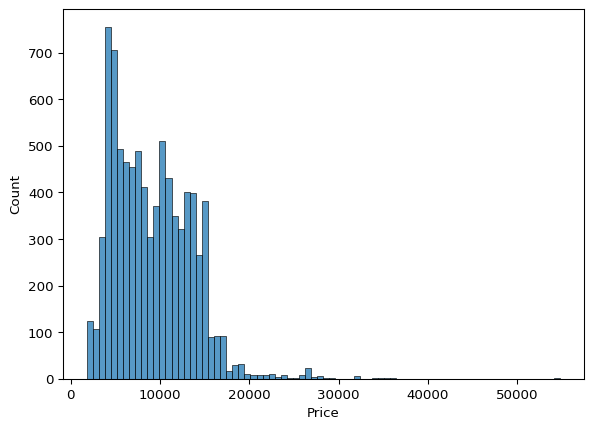

In [66]:
# Plot a histogram of flight prices
sns.histplot(data=planes, x='Price')
plt.show()

2. Muestra las estadísticas descriptivas de la duración del vuelo.


In [67]:
# Display descriptive statistics for flight duration
print(planes['Duration'].describe())

count    8508.000000
mean       10.726704
std         8.472415
min         0.100000
25%         2.800000
50%         8.700000
75%        15.500000
max        47.700000
Name: Duration, dtype: float64


3. **Pregunta**

¿Qué columna contiene potencialmente valores atípicos?

**Respuestas Posibles**

- [ ] `"Price"`
- [ ] `"Duration"`
- [x] `"Price"` y `"Duration"`
- [ ] Ninguna

Los histogramas, diagramas de caja y estadísticas descriptivas también son métodos útiles para identificar valores extremos. ¡Ahora vamos a tratarlos!


### Eliminar valores atípicos

Aunque eliminar los valores atípicos no siempre es el camino a seguir, para tu análisis has decidido que solo incluirás los vuelos en los que el `"Price"` no sea un valor atípico.

Por lo tanto tienes que encontrar el umbral superior y utilizarlo para eliminar los valores que lo superen del Dataframe `planes`.

#### Instrucciones

1. Halla los percentiles 75 y 25, guardando como `price_seventy_fifth` y `price_twenty_fifth` respectivamente.


In [68]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes['Price'].quantile(0.75)
price_twenty_fifth = planes['Price'].quantile(0.25)

2. Calcula el IQR, almacenándolo como `prices_iqr`.


In [69]:
# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth
print(prices_iqr)

7014.0


3. Calcula los umbrales superior e inferior de los valores atípicos.


In [70]:
# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

4. Elimina los valores atípicos de `planes`.


In [71]:
# Subset the data
planes = planes[(planes['Price'] > lower) & (planes['Price'] < upper)]

print(planes['Price'].describe())

count     8438.000000
mean      8877.466046
std       4001.838236
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64


¡Habilidades ridículas para eliminar valores atípicos! Lograste crear umbrales basados en el IQR y los usaste para filtrar el conjunto de datos `planes` para eliminar precios extremos. Originalmente, el conjunto de datos tenía un precio máximo de casi 55000, pero la salida de `planes['Price'].describe()` muestra que el máximo se ha reducido a alrededor de 23000, ¡reflejando una distribución menos sesgada para el análisis!